In [115]:
import pandas as pd
import numpy as np

In [116]:
df = pd.read_csv('titanic_train.csv')  #classification  - Category ML

In [117]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
df.shape

(891, 12)

In [119]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis =1, inplace= True)

In [120]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [121]:
import seaborn as sns

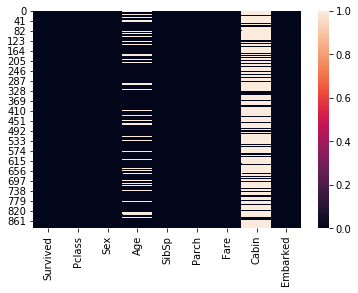

In [17]:
sns.heatmap(df.isnull())

In [122]:
df.drop('Cabin', axis = 1, inplace = True)

In [123]:
df['Age'].mean()

29.69911764705882

C:\Users\Dieshh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


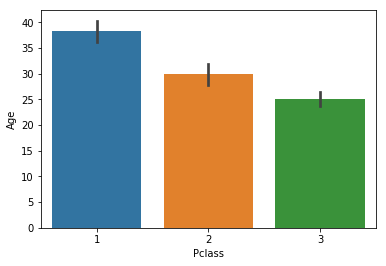

In [124]:
sns.barplot(x = 'Pclass', y = 'Age', data = df)

In [125]:
df[df['Pclass']==1].mean()['Age']

38.233440860215055

In [126]:
df[df['Pclass']==2].mean()['Age']

29.87763005780347

In [127]:
df[df['Pclass']==3].mean()['Age']

25.14061971830986

In [36]:
#As we cannot replace  the mean  valkue for all null fields

In [128]:
df.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [129]:
def func(var):
    a  = var[0]
    p = var[1]
    
    if pd.isnull(a):
        if p == 1:
            return 38
        elif p == 2:
            return 30
        else:
            return 25
    else:
        return a

In [130]:
df['Age'] = df[['Age', 'Pclass']].apply(func, axis =1) #inside apply we have used function with axix bacause we are poassing teo values, for one value bydefault axis will be takne as 1

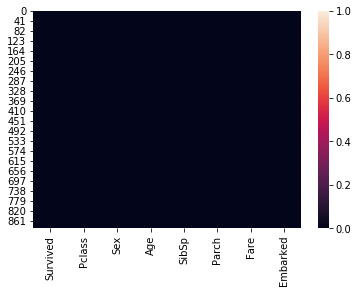

In [131]:
sns.heatmap(df.isnull())

In [132]:
df.dropna(inplace = True) #as embarged is having the null values no need to pass alos axis is by default 0

In [133]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [134]:
df_sex = pd.get_dummies(df['Sex'], drop_first=True) #drop_first remove the 1st column as we need to keep data small

In [135]:
df_sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [136]:
df_embarked = pd.get_dummies(df['Embarked'],drop_first=True) #get_dummies will add binary values depend on values (0,1)

In [137]:
df_embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [138]:
df = pd.concat([df, df_sex,df_embarked], axis = 1) #concat will club

In [139]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [140]:
df.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

In [141]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
male        889 non-null uint8
Q           889 non-null uint8
S           889 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


In [143]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
Survived,1.000000,-0.335549,-0.054934,-0.034040,0.083151,0.255290,-0.541585,0.004536,-0.151777
Pclass,-0.335549,1.000000,-0.401322,0.081656,0.016824,-0.548193,0.127741,0.220558,0.076466
Age,-0.054934,-0.401322,1.000000,-0.242834,-0.174280,0.118205,0.085564,-0.070847,0.006325
SibSp,-0.034040,0.081656,-0.242834,1.000000,0.414542,0.160887,-0.116348,-0.026692,0.069438
Parch,0.083151,0.016824,-0.174280,0.414542,1.000000,0.217532,-0.247508,-0.081585,0.061512
Fare,0.255290,-0.548193,0.118205,0.160887,0.217532,1.000000,-0.179958,-0.116684,-0.163758
male,-0.541585,0.127741,0.085564,-0.116348,-0.247508,-0.179958,1.000000,-0.075217,0.121405
Q,0.004536,0.220558,-0.070847,-0.026692,-0.081585,-0.116684,-0.075217,1.000000,-0.499261
S,-0.151777,0.076466,0.006325,0.069438,0.061512,-0.163758,0.121405,-0.499261,1.000000


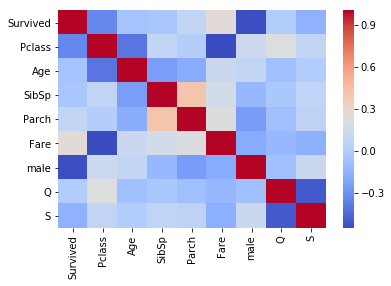

In [144]:
sns.heatmap(df.corr(), cmap = 'coolwarm')

In [145]:
from sklearn.preprocessing import StandardScaler

In [146]:
ss = StandardScaler()

In [147]:
scaled_array = ss.fit_transform(df.drop('S', axis = 1))

In [148]:
scaled_array

array([[-0.78696114,  0.82520863, -0.5480701 , ..., -0.50023975,
         0.73534203, -0.30794088],
       [ 1.27071078, -1.57221121,  0.66675654, ...,  0.78894661,
        -1.35991138, -0.30794088],
       [ 1.27071078,  0.82520863, -0.24436344, ..., -0.48664993,
        -1.35991138, -0.30794088],
       ...,
       [-0.78696114,  0.82520863, -0.3202901 , ..., -0.17408416,
        -1.35991138, -0.30794088],
       [ 1.27071078, -1.57221121, -0.24436344, ..., -0.0422126 ,
         0.73534203, -0.30794088],
       [-0.78696114,  0.82520863,  0.21119655, ..., -0.49017322,
         0.73534203,  3.24737656]])

In [149]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [150]:
x = pd.DataFrame(data = scaled_array, columns = df.columns[1:])

In [151]:
y = df['Survived']

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [154]:
x_train.shape

(622, 8)

In [155]:
y_train.shape

(622,)

In [156]:
x_test.shape

(267, 8)

In [157]:
y_test.shape

(267,)

In [158]:
from sklearn.linear_model import LogisticRegression

In [162]:
model = LogisticRegression()

In [163]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [164]:
model.coef_

array([[ 4.51572586, -0.30166456, -0.1739324 , -0.14253613, -0.05322194,
         0.12878996, -0.4846529 ,  0.00570655]])

In [165]:
model.intercept_

array([-1.09537295])

In [166]:
model.predict(x_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1], dtype=int64)

In [167]:
ypred = model.predict(x_test)

In [168]:
len(ypred)

267

In [169]:
len(y_test)

267

In [170]:
import  matplotlib.pyplot as plt

(array([  0.,   0.,   0.,   0.,   0., 267.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

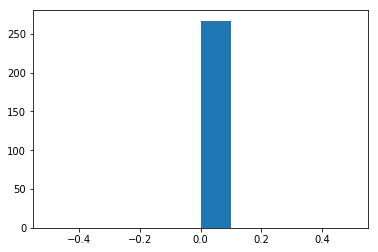

In [171]:
plt.hist(y_test - ypred)

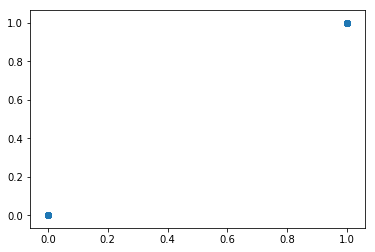

In [172]:
plt.scatter(y_test, ypred)

In [173]:
from sklearn.metrics import confusion_matrix

In [174]:
confusion_matrix(y_test, ypred)

array([[171,   0],
       [  0,  96]], dtype=int64)

In [108]:
y_test.unique()

array([1, 0], dtype=int64)

In [176]:
from sklearn import  metrics

In [177]:
metrics.mean_absolute_error(y_test, ypred)

0.0

In [178]:
abs(y_test-ypred).mean()

0.0